In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.inspection import permutation_importance
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
color = "#2E3037"
background_color = "Dark" # Dark or White

## Loading data

In [2]:
data = pd.read_csv("../dataset/dataset_2.csv", sep = ";").drop("Unnamed: 0", 1).sample(1000000)
train, test = train_test_split(data, test_size=0.30)
data.describe()

,SG_UF_RESIDENCIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ESCOLA,TP_LINGUA,NU_IDADE,TP_ANO_CONCLUIU,Escolaridade_Pai,...,DVD,TV_Assinatura,Celular,Telefone_Fixo,Computador,Internet,Renda_per_capta,Pessoas_por_quarto,Computador_por_pessoa,Celulares_por_pessoa
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,0.001660,-0.000188,0.000524,-0.002437,0.000043,-0.023803,-0.001571,0.001077,-0.000041,-0.017759,...,-0.000112,-0.006004,0.001924,-0.005655,-0.021752,0.010936,836.653721,1.871390,0.207476,0.673590
std,0.381108,0.165957,0.147626,0.394680,0.040031,0.490854,0.470341,0.266700,0.059085,0.677683,...,0.134643,0.381901,0.480098,0.382201,0.755218,0.467562,1259.309229,0.996568,0.253837,0.310849
min,-0.414691,-0.198886,-0.050390,-0.523084,-0.015842,-1.824682,-0.497122,-0.405508,-0.088091,-1.707128,...,-0.204585,-0.738688,-0.656355,-0.685471,-2.423190,-0.239058,0.000000,0.000000,0.000000,0.000000
25%,-0.342011,-0.198886,-0.050390,-0.523084,-0.015842,0.009853,-0.497122,-0.162384,-0.046794,-0.392296,...,-0.204585,0.193056,-0.309154,0.209223,-0.375502,-0.239058,299.400000,1.333333,0.000000,0.500000
50%,-0.014707,0.138424,-0.050390,0.279355,0.006393,0.009853,0.444843,-0.018454,0.023407,0.203686,...,0.088548,0.193056,0.148205,0.209223,-0.375502,-0.239058,499.000000,1.666667,0.200000,0.666667
75%,0.310823,0.138424,-0.050390,0.279355,0.006393,0.279240,0.444843,0.166924,0.023407,0.581868,...,0.088548,0.193056,0.148205,0.209223,0.691315,-0.239058,831.666667,2.000000,0.333333,1.000000
max,0.767374,0.138424,1.159082,0.999284,0.675727,0.279240,0.444843,1.945867,0.130936,1.107397,...,0.088548,0.193056,0.721333,0.209223,0.691315,0.885415,30000.000000,20.000000,4.000000,4.000000


## Feature importance

### Correlation Matrix

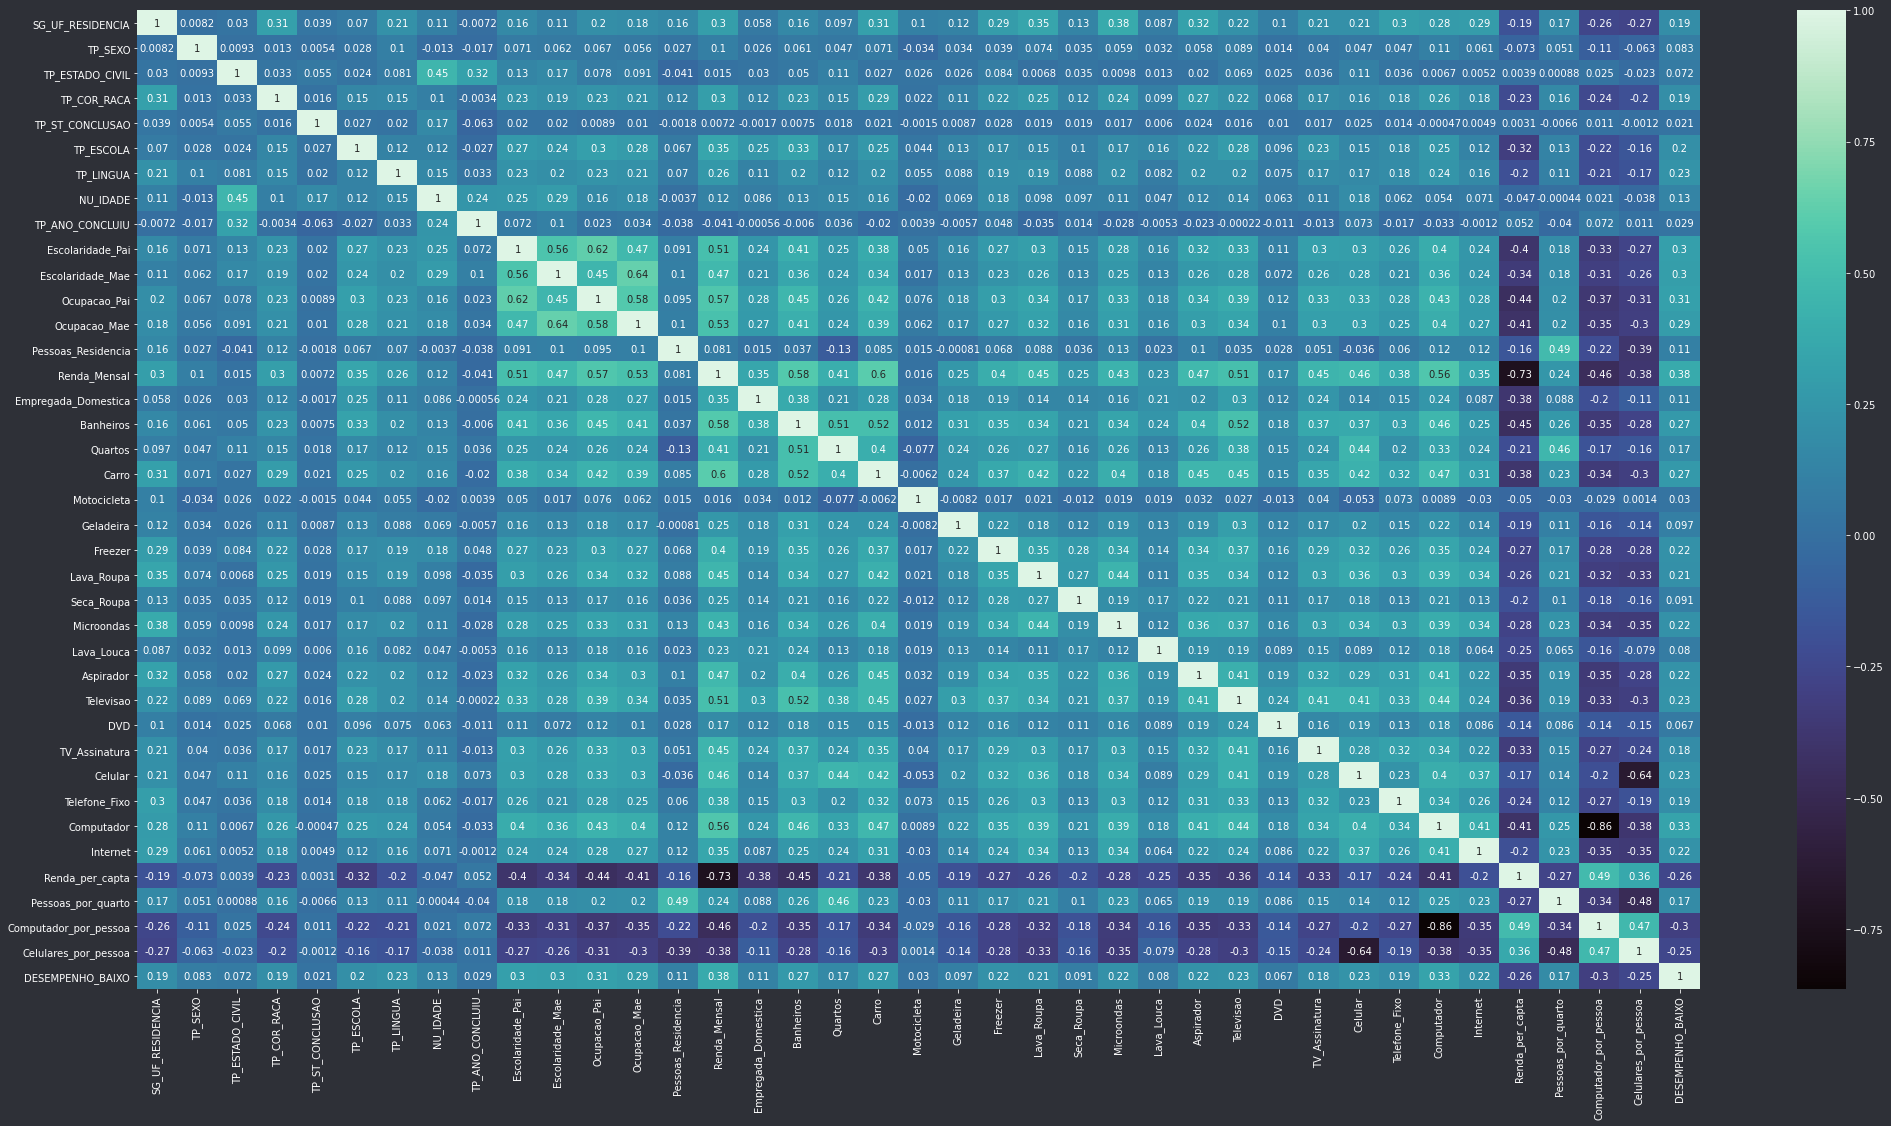

In [3]:
if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(35, 18))

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(35, 18), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)

sns.heatmap(data.corr(),annot=True,cmap="mako")
plt.savefig("../pictures/Matriz_correlação.png")

### Gini index

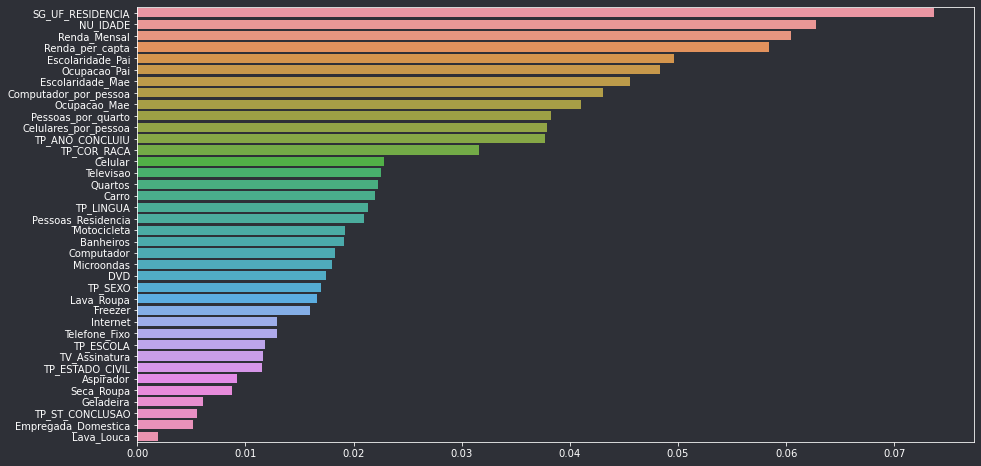

In [4]:
model = RandomForestClassifier(n_jobs = -1).fit(data.drop("DESEMPENHO_BAIXO", 1), data["DESEMPENHO_BAIXO"])
gini_importance = pd.Series(model.feature_importances_, index = data.drop("DESEMPENHO_BAIXO", 1).columns)
gini_importance.sort_values(ascending=False,inplace=True)

if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(15, 8))

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(15, 8), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)

sns.barplot(x = gini_importance, y = gini_importance.index)
plt.savefig("../pictures/Gini.png")

### Permutation Importance

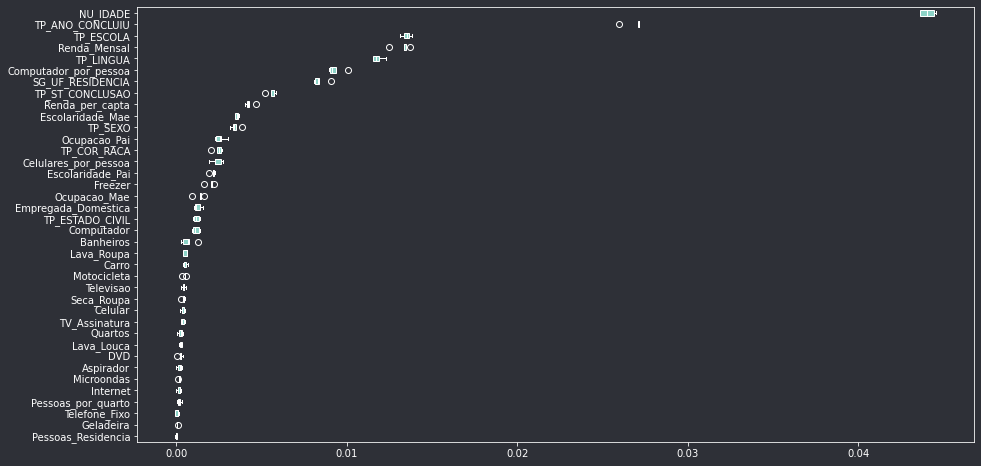

In [5]:
model = xgb.XGBClassifier(n_jobs = -1).fit(train.drop(["DESEMPENHO_BAIXO"], 1), train["DESEMPENHO_BAIXO"])
r = permutation_importance(model, test.drop("DESEMPENHO_BAIXO",1), test["DESEMPENHO_BAIXO"], n_repeats = 5)
sorted_idx = r.importances_mean.argsort()

if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(15, 8))
    ax.boxplot(r.importances[sorted_idx].T, vert=False, labels = train.drop("DESEMPENHO_BAIXO",1).columns[sorted_idx])
    
else:
    plt.style.use('dark_background')
    plt.figure(figsize=(15, 8), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)
    c = "w"
    ax.boxplot(r.importances[sorted_idx].T, vert=False, labels = train.drop("DESEMPENHO_BAIXO",1).columns[sorted_idx], 
                patch_artist=True,
                boxprops=dict(color=c),
                capprops=dict(color=c),
                whiskerprops=dict(color=c),
                flierprops=dict(color=c, markeredgecolor=c),
                medianprops=dict(color=c),
                )

permutation_importance_list = pd.Series(r.importances_mean[sorted_idx], index = train.drop("DESEMPENHO_BAIXO",1).columns[sorted_idx])
plt.savefig("../pictures/Permutation_XGBoost.png")

## Recursive Feature Elimination

### Removing Least important features according to Gini

Recall when using complete dataset: 74.81%. Precision: 70.51%
Recall when removing 1 variables: 74.82%. Precision: 70.49%
Recall when removing 2 variables: 74.93%. Precision: 70.38%
Recall when removing 3 variables: 74.84%. Precision: 70.41%
Recall when removing 4 variables: 74.9%. Precision: 70.41%
Recall when removing 5 variables: 74.9%. Precision: 70.39%
Recall when removing 6 variables: 74.91%. Precision: 70.37%
Recall when removing 7 variables: 74.8%. Precision: 70.4%
Recall when removing 8 variables: 74.99%. Precision: 70.35%
Recall when removing 9 variables: 74.37%. Precision: 70.32%
Recall when removing 10 variables: 74.47%. Precision: 70.36%
Recall when removing 11 variables: 74.45%. Precision: 70.33%
Recall when removing 12 variables: 74.2%. Precision: 70.33%
Recall when removing 13 variables: 74.26%. Precision: 70.31%
Recall when removing 14 variables: 74.43%. Precision: 69.96%
Recall when removing 15 variables: 74.42%. Precision: 69.99%
Recall when removing 16 variables: 74

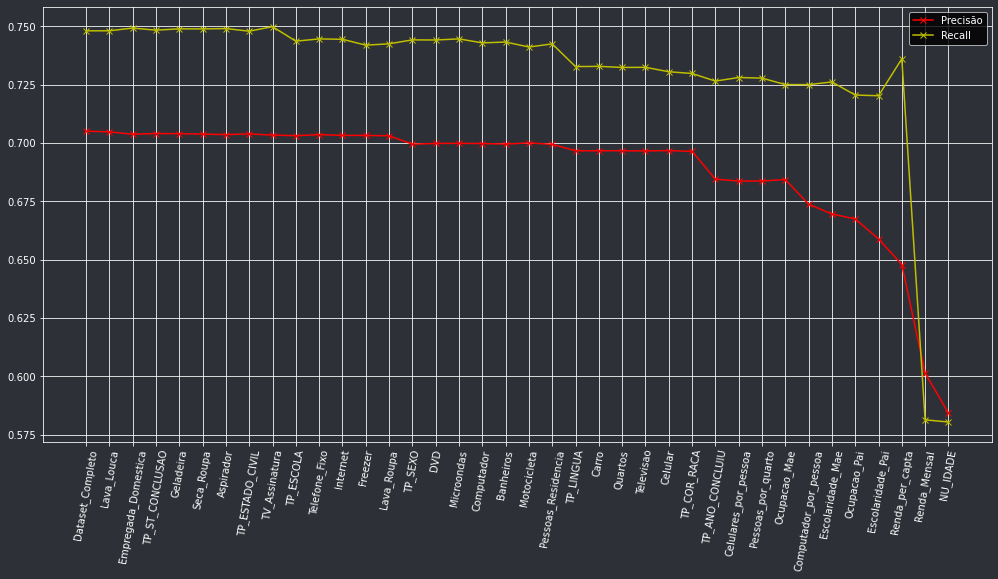

In [6]:
l_precision = []
l_recall = []
l_labels = []

gini_importance.sort_values(ascending = True, inplace = True)
train_temp = train
test_temp = test

model = xgb.XGBClassifier(n_jobs = -1).fit(train_temp.drop(["DESEMPENHO_BAIXO"], 1), train_temp["DESEMPENHO_BAIXO"])
predictions = model.predict(test_temp.drop(["DESEMPENHO_BAIXO"], 1))

precision = precision_score(test_temp["DESEMPENHO_BAIXO"] , predictions, average = "binary")
recall = recall_score(test_temp["DESEMPENHO_BAIXO"] , predictions, average = "binary")

l_precision.append(precision)
l_recall.append(recall)
l_labels.append("Dataset_Completo")

print("Recall when using complete dataset: " + str(round(recall*100, 2)) + "%. Precision: " + str(round(precision*100, 2)) + "%")

for i, remove_col in enumerate(gini_importance.index):

    train_temp = train_temp.drop(remove_col, 1)
    test_temp = test_temp.drop(remove_col, 1)
        
    if len(train_temp.columns) > 1:
        
        model = xgb.XGBClassifier(n_jobs = -1).fit(train_temp.drop(["DESEMPENHO_BAIXO"], 1), train_temp["DESEMPENHO_BAIXO"])
        predictions = model.predict(test_temp.drop(["DESEMPENHO_BAIXO"], 1))
        
        precision = precision_score(test_temp["DESEMPENHO_BAIXO"] , predictions, average = "binary")
        recall = recall_score(test_temp["DESEMPENHO_BAIXO"] , predictions, average = "binary")

        l_precision.append(precision)
        l_recall.append(recall)
        l_labels.append(remove_col)  

        print("Recall when removing " + str(i+1) + " variables: " + str(round(recall*100, 2)) + "%. Precision: " + str(round(precision*100, 2)) + "%")

if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(17, 8))

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(17, 8), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)
    
plt.grid(True)
plt.plot(l_labels, l_precision, 'rx-')
plt.plot(l_labels, l_recall, 'yx-')
plt.legend(["Precisão", "Recall"])
plt.xticks(rotation=80)
plt.savefig("../pictures/Gini_recursivo.png")

### Removing Least important features according to Permutation Importance

Recall when using complete dataset: 74.81%.
Recall when removing 1 variables: 74.79%. Precision: 70.5%
Recall when removing 2 variables: 74.88%. Precision: 70.47%
Recall when removing 3 variables: 74.79%. Precision: 70.5%
Recall when removing 4 variables: 74.9%. Precision: 70.57%
Recall when removing 5 variables: 74.85%. Precision: 70.53%
Recall when removing 6 variables: 74.9%. Precision: 70.46%
Recall when removing 7 variables: 74.83%. Precision: 70.52%
Recall when removing 8 variables: 74.88%. Precision: 70.45%
Recall when removing 9 variables: 74.87%. Precision: 70.45%
Recall when removing 10 variables: 74.83%. Precision: 70.42%
Recall when removing 11 variables: 74.91%. Precision: 70.39%
Recall when removing 12 variables: 74.85%. Precision: 70.44%
Recall when removing 13 variables: 74.92%. Precision: 70.4%
Recall when removing 14 variables: 74.88%. Precision: 70.43%
Recall when removing 15 variables: 74.81%. Precision: 70.41%
Recall when removing 16 variables: 74.76%. Precision: 7

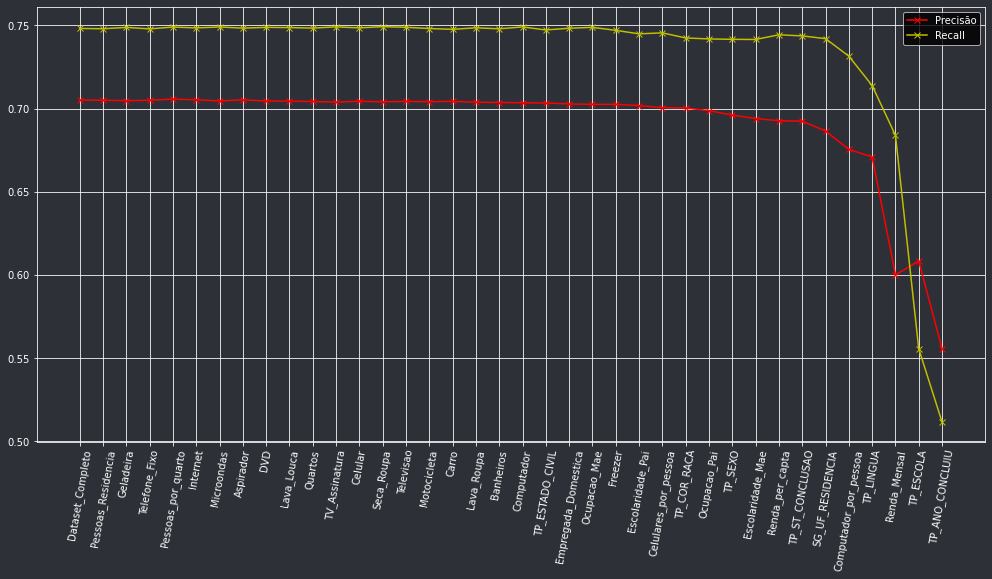

In [7]:
l_precision = []
l_recall = []
l_labels = []

train_temp = train
test_temp = test

model = xgb.XGBClassifier(n_jobs = -1).fit(train_temp.drop(["DESEMPENHO_BAIXO"], 1), train_temp["DESEMPENHO_BAIXO"])
predictions = model.predict(test_temp.drop(["DESEMPENHO_BAIXO"], 1))

precision = precision_score(test_temp["DESEMPENHO_BAIXO"] , predictions, average = "binary")
recall = recall_score(test_temp["DESEMPENHO_BAIXO"] , predictions, average = "binary")

l_precision.append(precision)
l_recall.append(recall)
l_labels.append("Dataset_Completo")

print("Recall when using complete dataset: " + str(round(recall*100, 2)) + "%.")

for i, remove_col in enumerate(permutation_importance_list.index):

    train_temp = train_temp.drop(remove_col, 1)
    test_temp = test_temp.drop(remove_col, 1)
        
    if len(train_temp.columns) > 1:
        
        model = xgb.XGBClassifier(n_jobs = -1).fit(train_temp.drop(["DESEMPENHO_BAIXO"], 1), train_temp["DESEMPENHO_BAIXO"])
        predictions = model.predict(test_temp.drop(["DESEMPENHO_BAIXO"], 1))
        
        precision = precision_score(test_temp["DESEMPENHO_BAIXO"] , predictions, average = "binary")
        recall = recall_score(test_temp["DESEMPENHO_BAIXO"] , predictions, average = "binary")

        l_precision.append(precision)
        l_recall.append(recall)
        l_labels.append(remove_col)  

        print("Recall when removing " + str(i+1) + " variables: " + str(round(recall*100, 2)) + "%. Precision: " + str(round(precision*100, 2)) + "%")

if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(17, 8))

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(17, 8), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)
    
plt.grid(True)
plt.plot(l_labels, l_precision, 'rx-')
plt.plot(l_labels, l_recall, 'yx-')
plt.legend(["Precisão", "Recall"])
plt.xticks(rotation=80)
plt.savefig("../pictures/Permutação_recursivo.png")

## Backward Feature Selection

#### Using Precision micro as reference

In [ ]:
l_precision = []
l_recall = []
l_labels = []

train_temp = train[:]
test_temp = test[:]

model = xgb.XGBClassifier(n_jobs = -1).fit(train_temp.drop(["DESEMPENHO_BAIXO"], 1), train_temp["DESEMPENHO_BAIXO"])
predictions = model.predict(test_temp.drop(["DESEMPENHO_BAIXO"], 1))

precision = precision_score(test_temp["DESEMPENHO_BAIXO"] , predictions, average = "binary")
recall = recall_score(test_temp["DESEMPENHO_BAIXO"] , predictions, average = "binary")

l_precision.append(precision)
l_recall.append(recall)
l_labels.append("Dataset_Completo") 

print("Recall using complete dataset: " + str(round(recall*100, 2)) + "%. Precision: " + str(round(precision*100, 2)) + "%.")

while len(train_temp.columns) > 2:
    
    
    features = train_temp.drop("DESEMPENHO_BAIXO", 1).columns[:]
    list_of_precision = []
    list_of_recall = []
    list_of_precision_micro = []
    
    for feature in features:

        test_temp.drop(feature, 1, inplace = True)
        train_temp.drop(feature, 1, inplace = True)

        model = xgb.XGBClassifier(n_jobs = -1).fit(train_temp.drop("DESEMPENHO_BAIXO", 1), train_temp["DESEMPENHO_BAIXO"])
        predictions = model.predict(test_temp.drop("DESEMPENHO_BAIXO", 1))

        precision = precision_score(test_temp["DESEMPENHO_BAIXO"] , predictions, average = "binary")
        precision_micro = precision_score(test_temp["DESEMPENHO_BAIXO"] , predictions, average = "micro")
        recall = recall_score(test_temp["DESEMPENHO_BAIXO"] , predictions, average = "binary")
        
        list_of_precision.append(precision)
        list_of_precision_micro.append(precision)
        list_of_recall.append(recall)  
        
        train_temp[feature] = train[feature]
        test_temp[feature] = test[feature] 
    
    best_precision = 0

    for i, feature in enumerate(features):

        if list_of_precision_micro[i] > best_precision:
            best_precision = list_of_precision[i]
            best_recall = list_of_recall[i]
            best_feature = feature

    train_temp.drop(best_feature, 1, inplace = True)
    test_temp.drop(best_feature, 1, inplace = True)
    
    l_precision.append(best_precision)
    l_recall.append(best_recall)
    l_labels.append(best_feature) 
    
    print("Recall when removing " + best_feature + ": " + str(round(best_recall*100, 2)) + "%. Precision: " + str(round(best_precision*100, 2)) + "%.")

if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(17, 8))

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(17, 8), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)
    
plt.grid(True)
plt.plot(l_labels, l_precision, 'rx-')
plt.plot(l_labels, l_recall, 'yx-')
plt.legend(["Precisão", "Recall"])
plt.xticks(rotation=80)
plt.savefig("../pictures/BackwardSelection.png")

## Removing features

In [8]:
data = pd.read_csv("../dataset/dataset_2.csv", sep = ";").drop("Unnamed: 0", 1)

removed_features = ["Pessoas_Residencia", "Geladeira", "Telefone_Fixo", "Pessoas_por_quarto", "Internet", "Microondas", 
                    "Aspirador", "DVD", "Lava_Louca", "Quartos", "TV_Assinatura", "Celular", "Seca_Roupa", "Televisao", 
                    "Motocicleta", "Carro", "Lava_Roupa", "Banheiros", "Computador", "TP_ESTADO_CIVIL", "Empregada_Domestica", 
                    "Ocupacao_Mae", "Freezer"] 


data.drop(removed_features, 1, inplace = True)
train, test = train_test_split(data, test_size=0.30)

## Permutation Importance of final features

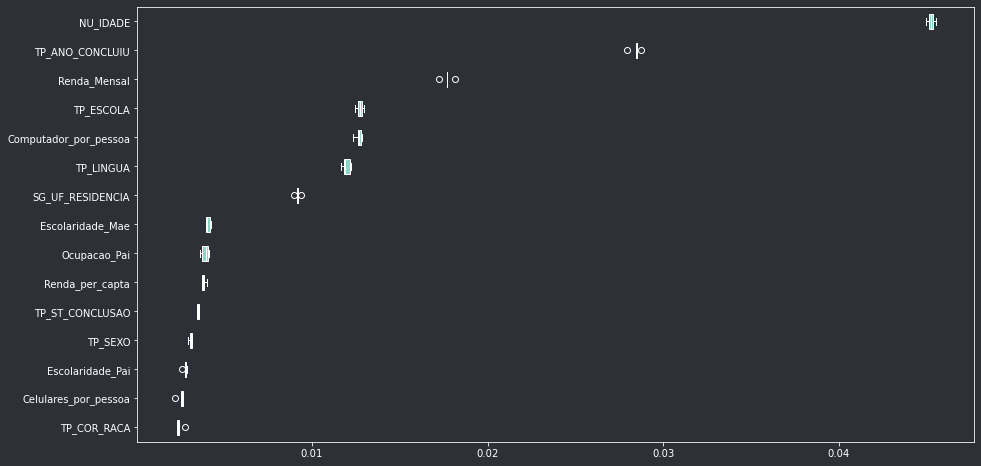

In [10]:
model = xgb.XGBClassifier(n_jobs = -1).fit(train.drop(["DESEMPENHO_BAIXO"], 1), train["DESEMPENHO_BAIXO"])
r = permutation_importance(model, test.drop("DESEMPENHO_BAIXO",1), test["DESEMPENHO_BAIXO"], n_repeats = 5)
sorted_idx = r.importances_mean.argsort()

if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(15, 8))
    ax.boxplot(r.importances[sorted_idx].T, vert=False, labels = train.drop("DESEMPENHO_BAIXO",1).columns[sorted_idx])
    
else:
    plt.style.use('dark_background')
    plt.figure(figsize=(15, 8), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)
    c = "w"
    ax.boxplot(r.importances[sorted_idx].T, vert=False, labels = train.drop("DESEMPENHO_BAIXO",1).columns[sorted_idx], 
                patch_artist=True,
                boxprops=dict(color=c),
                capprops=dict(color=c),
                whiskerprops=dict(color=c),
                flierprops=dict(color=c, markeredgecolor=c),
                medianprops=dict(color=c),
                )

## Saving data

In [9]:
data.to_csv("../dataset/dataset_3.csv", sep = ";")